## Импорт библиотек и чтение файла

### Цель работы
Изучение связи между признаками двумерного набора данных,
визуализация данных.

### Задание
1. Загрузить датасет с помощью библиотеки pandas. Оценить его через info и describe. Выполнить предварительную обработку данных, если это необходимо.
2. Построить точечную диаграмму (матрицу диаграмм рассеяния) для всех признаков. Выполнить анализ полученной диаграммы, отвечая на вопрос показывает ли она в среднем определенную зависимость между переменными. Изучите параметры и опишите взаимосвязи. Если параметров слишком много – может потребоваться создать несколько графиков. Минимум один график (диаграмму рассеивания) сделать по категориям (Например, зависимость зарплаты и возраста по каждой должности. На таком графике различные должности должны быть показаны разными ветами).
3. Постройте гистограммы для каждого числового признака, подберите оптимальное количество bins, сделайте выводы по полученными гистограммам.
4. Исследовать взаимосвязь между переменными с помощью оценки коэффициента корреляции и ковариации. Построить heatmap (тепловую карту корреляции). Выполнить интерпретацию результатов корреляции и ковариации, отвечая на вопросы о наличии (отсутствии) линейной взаимосвязи между переменными. Понимать, что такое корреляция и ковариация.
5. Постройте графики по заданию в варианте. Выполните интерпретацию, что вы видите на этих графиках.
6. Выполните минимум один любой график типа hexagonal binning plot. Сделайте выводы.
7. Выполните минимум один график типа boxplot для любого столбца. Сделайте выводы.
8. Добавьте категорию по любому числовому столбцу (например, уровень зарплаты - высокий, низкий, средний). Сделайте boxplot по этому числовому столбцу по каждой новой категории (на boxplot будет box-ы для средней, низкой и высокой зарплаты).
9. Выполните ещё минимум 2 графика boxplot по другим категориям (например, зарплата по полу, зарплата по должности и т.п. - в результате несколько box-ов для каждой категории на ном графике). Используйте для построения графиков разные библиотеки (минимум 2). Сделайте вывод.
10. Сделайте общие выводы по работе. В том числе с качественной интерпретацией.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('movies2.csv', sep = ';')

### Описание предметной области
**Вариант 5**\
Датасет ```movie2.csv``` содержит информацию о фильмах и/или сериалах, включая:
* title — название произведения;
* release_year — год выхода;
* score — пользовательская оценка (скорее всего, с IMDb);
* number_of_votes — количество голосов;
* duration — продолжительность в минутах;
* main_genre — основной жанр;
* main_production — страна (код ISO, например US, GB, IN, UA).
  
Такой набор признаков подходит для анализа кинематографических данных: сравнения оценок, популярности по странам, продолжительности и жанрам.

## 1. Обзор данных

In [2]:
df.head(20)

,title,release_year,score,number_of_votes,duration,main_genre,main_production
0,David Attenborough: A Life on Our Planet,2020.0,9.0,31180.0,83,documentary,GB
1,Inception,2010.0,8.8,2268288.0,148,scifi,GB
2,Forrest Gump,1994.0,8.8,1994599.0,142,drama,US
3,Anbe Sivam,2003.0,8.7,20595.0,160,comedy,IN
4,Bo Burnham: Inside,2021.0,8.7,44074.0,87,comedy,US
5,Saving Private Ryan,1998.0,8.6,1346020.0,169,drama,US
6,Django Unchained,2012.0,8.4,1472668.0,165,western,US
7,Dangal,2016.0,8.4,180247.0,161,action,IN
8,Bo Burnham: Make Happy,2016.0,8.4,14356.0,60,comedy,US
9,Louis C.K.: Hilarious,2010.0,8.4,11973.0,84,comedy,US


---
В наборе данных 389 строк и 7 столбцов; \
Типы данных: object (строковый), float64, int64; \
Пропуски: ```title``` (5 штук), ```release_year``` (2 штуки), ```score``` (3 штуки), ```number_of_votes``` (1 штука), ```main_production``` (1 штука)

---

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            384 non-null    object 
 1   release_year     387 non-null    float64
 2   score            386 non-null    float64
 3   number_of_votes  388 non-null    float64
 4   duration         389 non-null    int64  
 5   main_genre       389 non-null    object 
 6   main_production  388 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 21.4+ KB


In [4]:
df.describe()

,release_year,score,number_of_votes,duration
count,387.000000,386.000000,3.880000e+02,389.000000
mean,2010.976744,7.512176,1.391523e+05,123.352185
std,10.805726,0.443870,2.365279e+05,28.304800
min,1954.000000,6.900000,1.013900e+04,28.000000
25%,2007.500000,7.100000,2.055375e+04,104.000000
50%,2014.000000,7.400000,4.606950e+04,122.000000
75%,2018.000000,7.800000,1.551585e+05,139.000000
max,2022.000000,9.000000,2.268288e+06,229.000000


- count показывает количество заполненных строк в каждом столбце
- mean показывает среднее значение от всех столбцов
- std стандартное отклонение
- min минимальные зачения
- 25% - соответственное значение процентиля
- 50% - соответственное значение процентиля
- 75% - соответственное значение процентиля
- max - максимальное значение столбца
- видно ошибки в последний столбцах

По числовым признакам датасета можно сделать следующие выводы. Большинство фильмов в выборке вышли в последние годы, средний год выпуска — 2011, а медиана — 2014, что говорит о преобладании современных проектов. Оценки фильмов высокие: среднее значение около 7,5, а разброс небольшой (от 6,9 до 9), что указывает на включение в датасет преимущественно популярных или топовых произведений.\
Число голосов распределено неравномерно: большинство фильмов имеют относительно умеренное количество оценок, но есть несколько хитов с более чем миллионом голосов, что сильно повышает среднее значение. Продолжительность фильмов варьируется от 28 до 229 минут, при этом средняя и медианная длина составляет около двух часов, что характерно для кино и полнометражных шоу. В целом датасет отражает популярные, высокооценённые фильмы разных жанров и стран производства.

## 2. Проверка и заполнение пропусков

In [5]:
print(df.isna().sum())

title              5
release_year       2
score              3
number_of_votes    1
duration           0
main_genre         0
main_production    1
dtype: int64


Найдено 5 пропусков в столбце ```title```, 2 пропуска в ```release_year```, 3 пропуска в ```score```, по 1 пропуску в ```number_of_votes``` и ```main_production```. Эти пропуски нельзя заполнить, т.к. все значения уникальные и принадлежат определенному фильму, поэтому было принято решение удалить строки с пропусками

In [6]:
df_clean = df.dropna()

In [7]:
print(df_clean.isna().sum(), '\n')

title              0
release_year       0
score              0
number_of_votes    0
duration           0
main_genre         0
main_production    0
dtype: int64 



## 3. Поиск явных и неявных дубликатов

### Неявные дубликаты

In [8]:
print('main_genre', df_clean['main_genre'].unique())
print('main_production', df_clean['main_production'].unique())

main_genre ['documentary' 'scifi' 'drama' 'comedy' 'western' 'action' 'crime'
 'thriller' 'war' 'fantasy' 'romance' 'horror' 'animation' 'sports'
 'COMEDY' 'dramaa' 'musical']
main_production ['GB' 'US' 'IN' 'UA' 'CD' 'TR' 'ES' 'AU' 'JP' 'ZA' 'HK' 'DE' 'KR' 'CA'
 'BE' 'NO' 'NZ' 'MX' 'FR' 'MW' 'TH' 'AR' 'PS' 'HU' 'IT' 'CN' 'PL' 'KH'
 'IE' 'BR' 'XX' 'LT' 'NL' 'DK' 'ID']


Неявные дубликаты найдены в столбце ```main_genre```

In [9]:
print(df_clean['main_genre'].value_counts())

main_genre
drama          147
thriller        61
comedy          55
crime           21
documentary     20
romance         20
fantasy         19
horror           8
western          7
scifi            7
action           5
war              3
animation        3
musical          3
COMEDY           2
sports           1
dramaa           1
Name: count, dtype: int64


На основе полученных данных создан словарь для преобразования данных

In [10]:
df['main_genre'] = df['main_genre'].replace('COMEDY', 'comedy')
df['main_genre'] = df['main_genre'].replace('dramaa', 'drama')
print('main_genre', df_clean['main_genre'].unique())

main_genre ['documentary' 'scifi' 'drama' 'comedy' 'western' 'action' 'crime'
 'thriller' 'war' 'fantasy' 'romance' 'horror' 'animation' 'sports'
 'COMEDY' 'dramaa' 'musical']


Все неявные дубликаты устранены. Данные приведены к корректному виду, теперь с ними можно уверенно работать дальше

### Явные дубликаты

In [11]:
print(f"Количество дубликатов: {df_clean.duplicated().sum()}")
print(f'Количество строк в датафрейме до удаления явных дубликатов: {df_clean.shape[0]}')

Количество дубликатов: 2
Количество строк в датафрейме до удаления явных дубликатов: 383


* Было обнаружено 2 строки явных дубликатов

In [12]:
df_clean = df_clean.drop_duplicates().reset_index(drop = True)
print(f"Количество дубликатов: {df_clean.duplicated().sum()}")
print(f'Количество строк в датафрейме до удаления явных дубликатов: {df_clean.shape[0]}')

Количество дубликатов: 0
Количество строк в датафрейме до удаления явных дубликатов: 381


## 4. Проверка типов данных

In [13]:
df_clean.dtypes

title               object
release_year       float64
score              float64
number_of_votes    float64
duration             int64
main_genre          object
main_production     object
dtype: object

Исходные типы данных:
- title - строковый
- release_year - вещественный
- score - вещественный
- number_of_votes - вещественный
- duration - целочисленный
- main_genre - строковый
- main_production - строковый

Преобразование типов данных:
* release_year - из float64 в datetime
* number_of_votes - из float64 в int64

In [14]:
df_clean['release_year'] = pd.to_datetime(df_clean['release_year'], format='%Y')
df_clean['number_of_votes'] = df_clean['number_of_votes'].astype(int)
print(df_clean.dtypes)

title                      object
release_year       datetime64[ns]
score                     float64
number_of_votes             int64
duration                    int64
main_genre                 object
main_production            object
dtype: object


Конечные типы данных:
- title - строковый
- release_year - дата
- score - вещественный
- number_of_votes - целочисленный
- duration - целочисленный
- main_genre - строковый
- main_production - строковый

## 5. Построение матрицы рассеивания

Матрица рассеивания для ```score```, ```number_of_votes```, ```duration```, ```main_genre```


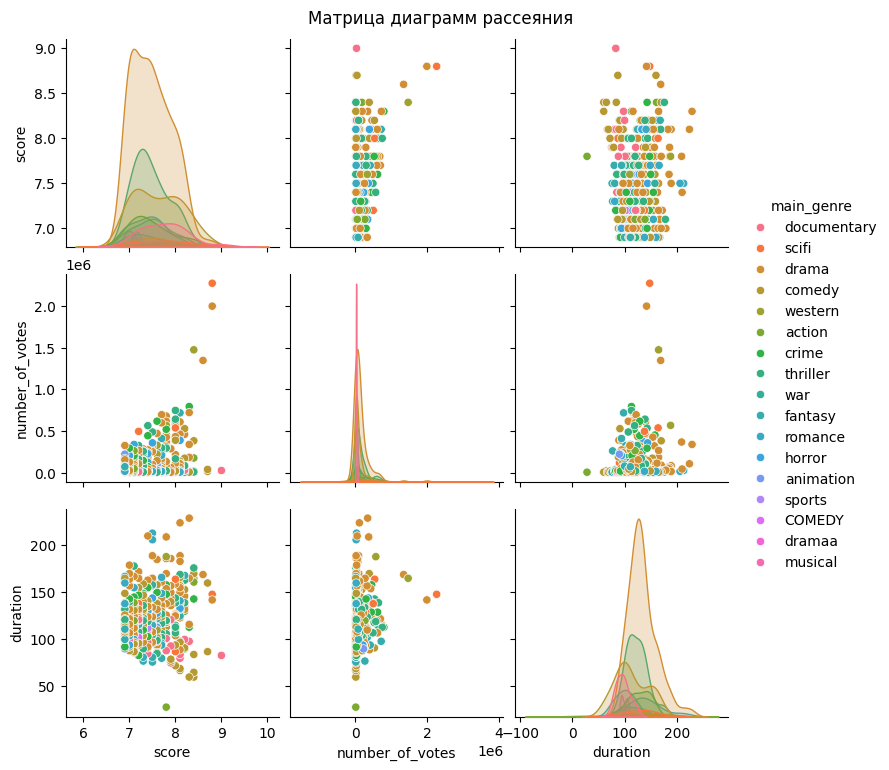

In [15]:
sns.pairplot(df_clean[['score', 'number_of_votes', 'duration', 'main_genre']],
             hue='main_genre')
plt.suptitle("Матрица диаграмм рассеяния", y=1.02)
plt.show()

Параметры и их взаимосвязи:
- По продолжительности самые длинные в жанре драма
- По количеству голосов также больше всего у жанра драма, но имеется единичный фильм в жанре документальный, с количеством голосов >2 млн, что существенно влияет на среднее кол-во голосов
- По оценкам самые успешные так же в жанре драма

## 6. Гистограммы

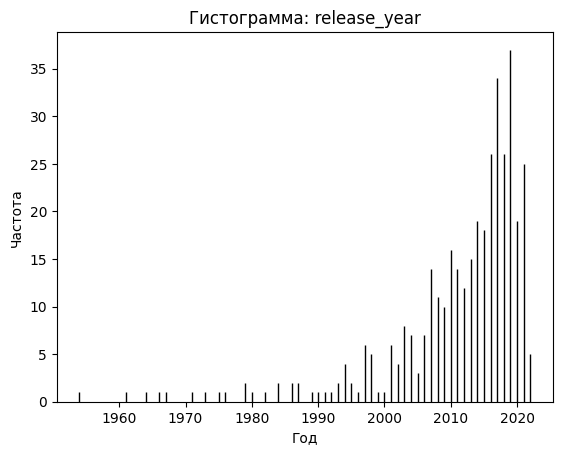

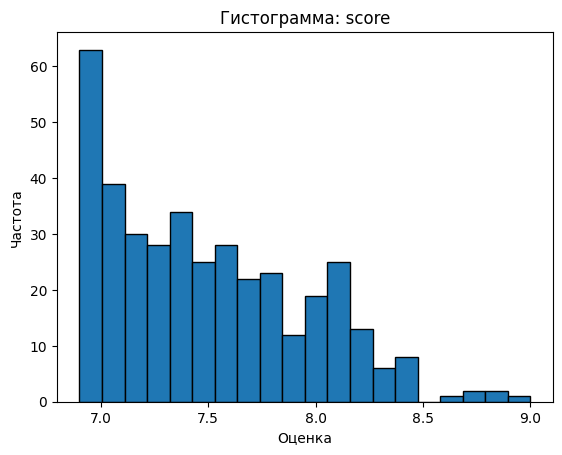

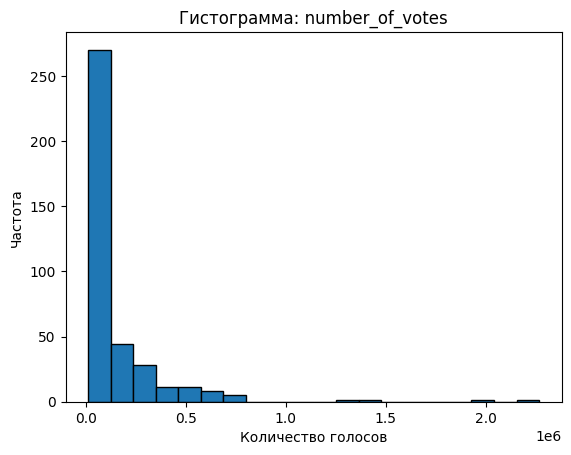

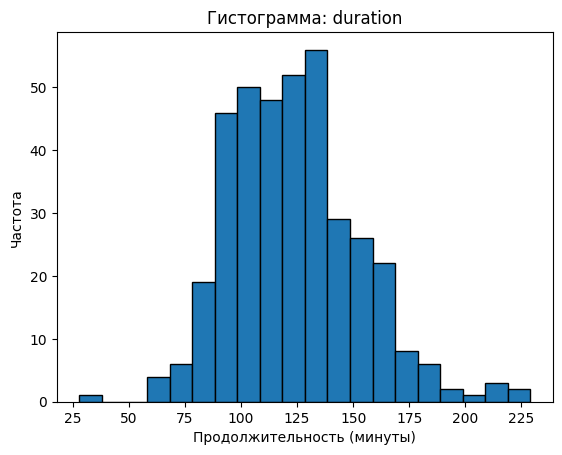

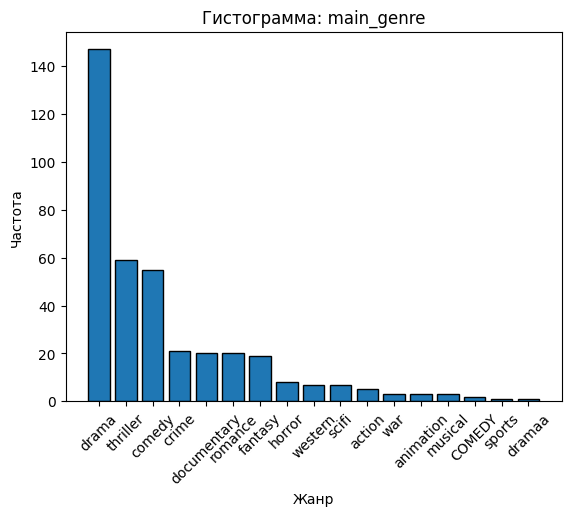

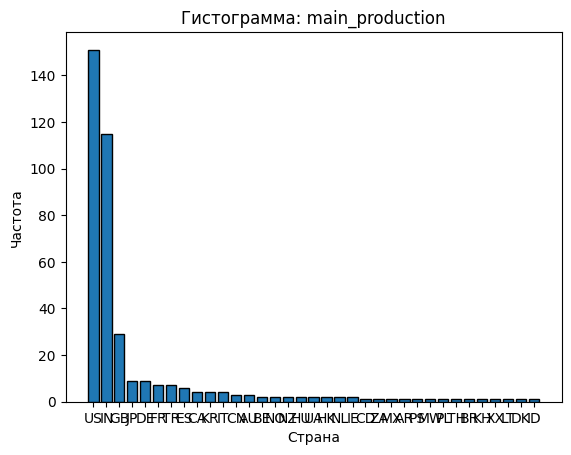

In [16]:
counts = df_clean["release_year"].value_counts().sort_index()
plt.bar(counts.index, counts.values, edgecolor="black")
plt.title("Гистограмма: release_year")
plt.xlabel("Год")
plt.ylabel("Частота")
plt.show()

plt.hist(df_clean["score"], bins=20, edgecolor="black")
plt.title("Гистограмма: score")
plt.xlabel("Оценка")
plt.ylabel("Частота")
plt.show()

plt.hist(df_clean["number_of_votes"], bins=20, edgecolor="black")
plt.title("Гистограмма: number_of_votes")
plt.xlabel("Количество голосов")
plt.ylabel("Частота")
plt.show()

plt.hist(df_clean["duration"], bins=20, edgecolor="black")
plt.title("Гистограмма: duration")
plt.xlabel("Продолжительность (минуты)")
plt.ylabel("Частота")
plt.show()

counts = df_clean["main_genre"].value_counts()
plt.bar(counts.index, counts.values, edgecolor="black")
plt.title("Гистограмма: main_genre")
plt.xlabel("Жанр")
plt.ylabel("Частота")
plt.xticks(rotation=45)
plt.show()

counts = df_clean["main_production"].value_counts()
plt.bar(counts.index, counts.values, edgecolor="black")
plt.title("Гистограмма: main_production")
plt.xlabel("Страна")
plt.ylabel("Частота")
plt.show()

Гистограммы показывают, что подавляющее большинство картин:
* было выпущено после 2010 года
* имеют оценку 6.9 - 7.8
* количество голосов до 100 тыс.
* продолжительность 85 - 130 минут
* в жанрах драма/триллер/комедия
* выпущены странами US и IN

## 7. Кореляция и ковариация

Разница Корреляции и Ковариации:
- Ковариация - мера, используемая для указания степени изменения двух случайных переменных в тандеме.
- Корреляция - мера, используемая для представления, насколько сильно связаны две случайные величины.

In [17]:
selected_columns = ['release_year', 'score', 'number_of_votes', 'duration']

correlation = df_clean[selected_columns].corr()

covariance = df_clean[selected_columns].cov()

print("Корреляция:\n", correlation)
print("\nКовариация:\n", covariance)

Корреляция:
                  release_year     score  number_of_votes  duration
release_year         1.000000 -0.152454        -0.212221 -0.103094
score               -0.152454  1.000000         0.347352  0.127034
number_of_votes     -0.212221  0.347352         1.000000  0.102842
duration            -0.103094  0.127034         0.102842  1.000000

Ковариация:
                  release_year         score  number_of_votes      duration
release_year     1.175121e+35 -2.326060e+16    -1.710339e+22 -1.008211e+18
score           -2.326060e+16  1.980996e-01     3.634659e+04  1.613011e+00
number_of_votes -1.710339e+22  3.634659e+04     5.527182e+10  6.897609e+05
duration        -1.008211e+18  1.613011e+00     6.897609e+05  8.138655e+02


---
Корреляционная матрица показывает, что сильных связей между числовыми признаками нет — все коэффициенты корреляции находятся в диапазоне от –0.21 до +0.35. Небольшая положительная связь наблюдается между оценкой (score) и числом голосов (number_of_votes) (r ≈ 0.35), что может указывать на то, что более высоко оценённые фильмы чаще получают больше оценок зрителей. Также прослеживается слабая положительная корреляция между оценкой и длительностью фильма (r ≈ 0.13): чуть более длинные фильмы могут восприниматься зрителями как более качественные.

С другой стороны, год выпуска (release_year) слабо отрицательно связан с остальными признаками: чем новее фильм, тем немного меньше его длительность и число голосов. Это можно объяснить тем, что новые фильмы просто не успели набрать столько отзывов, сколько классические картины, представленные дольше.

Ковариационная матрица подтверждает те же тенденции, однако из-за разницы в масштабах переменных её значения сложно напрямую интерпретировать — ковариация лишь указывает направление связи.

В целом можно заключить, что в датасете зависимости между признаками выражены слабо, а оценки фильмов лишь умеренно связаны с их популярностью и длительностью.

---

## 8. Построение heatmap

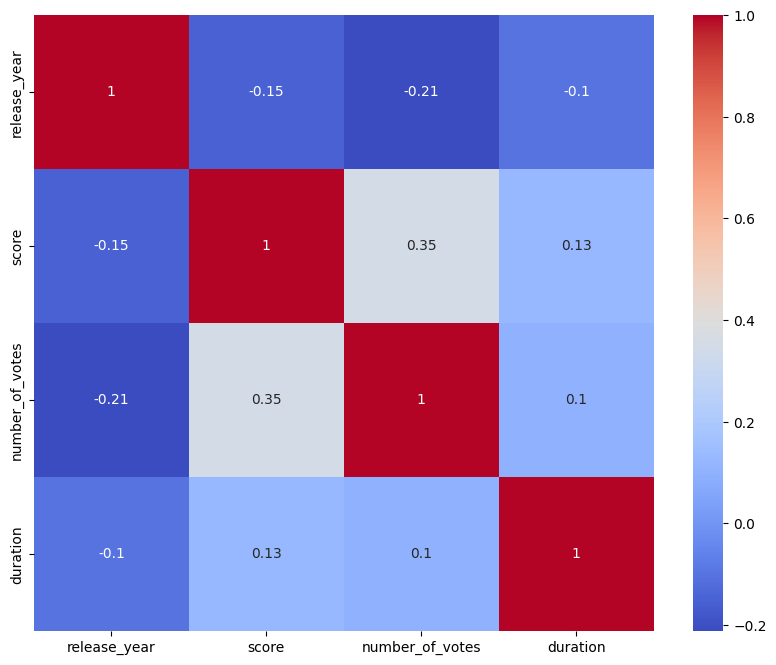

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

Используя тепловую карту кореляции, так же можно сделать выводы, описанные выше.

## 9. Выполнение индивидуальных заданий

### Задание 1
Использовать seaborn. Отфильтровать данные - год выхода фильма с 2020 По группировке - main_production и количество фильмов каждого жанра
(main_genre) построить диаграмму

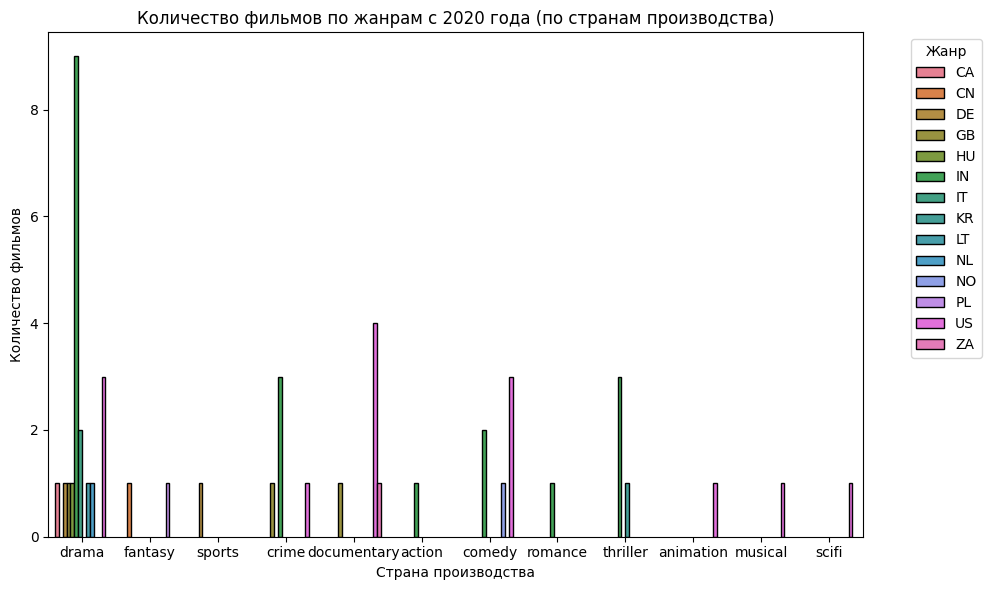

In [19]:
df_recent = df_clean[df_clean["release_year"].dt.year >= 2020]

grouped = (
    df_recent.groupby(["main_production", "main_genre"])
    .size()
    .reset_index(name="count")
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=grouped,
    x="main_genre",
    y="count",
    hue="main_production",
    edgecolor="black"
)

plt.title("Количество фильмов по жанрам с 2020 года (по странам производства)")
plt.xlabel("Страна производства")
plt.ylabel("Количество фильмов")
plt.legend(title="Жанр", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

На графике видно, что больше всего производитель IN снял в жанре драма, как и большинство остальных стран, US - в жанре документальный. Меньше всего снимают в жанрах scifi, musical, animation, romance, sports и action

### Задание 2
Использовать pandas и plot. Отфильтровать данные и выбрать год выхода - больше 2010. По сводной таблице (pivot_table) - отобразить среднее
количество голосов (number_of_votes) по годам. Оставить только маркеры в виде ⬥ синего цвета размером 14

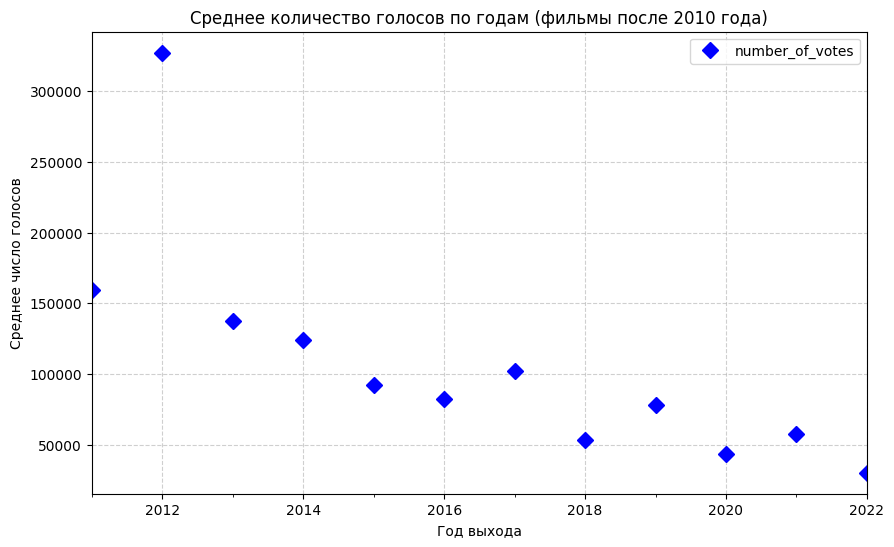

In [20]:
df_filtered = df_clean[df_clean["release_year"].dt.year > 2010]

pivot = df_filtered.pivot_table(
    index="release_year",
    values="number_of_votes",
    aggfunc="mean"
)

pivot.plot(
    marker='D',
    markersize=8,
    linestyle='None',
    color='blue',
    figsize=(10, 6)
)

plt.title("Среднее количество голосов по годам (фильмы после 2010 года)")
plt.xlabel("Год выхода")
plt.ylabel("Среднее число голосов")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

По графику видно, что у фильмов, выпущенных позже, меньшее количество голосов. Это объясняется тем, что прошло не так много времени, и картины не успели получить столько голосов, как более старые. Но в 2012 заметен скачок голосов. Скорее всего в этот год вышел очень популярный фильм, который собрал большое количество голосов за короткое время

### Задание 3 
Использовать matplotlib. Построить круговую диаграмму, которая отображает распределение фильмов по годам (отобразите фильмы только 2020 года и выше).

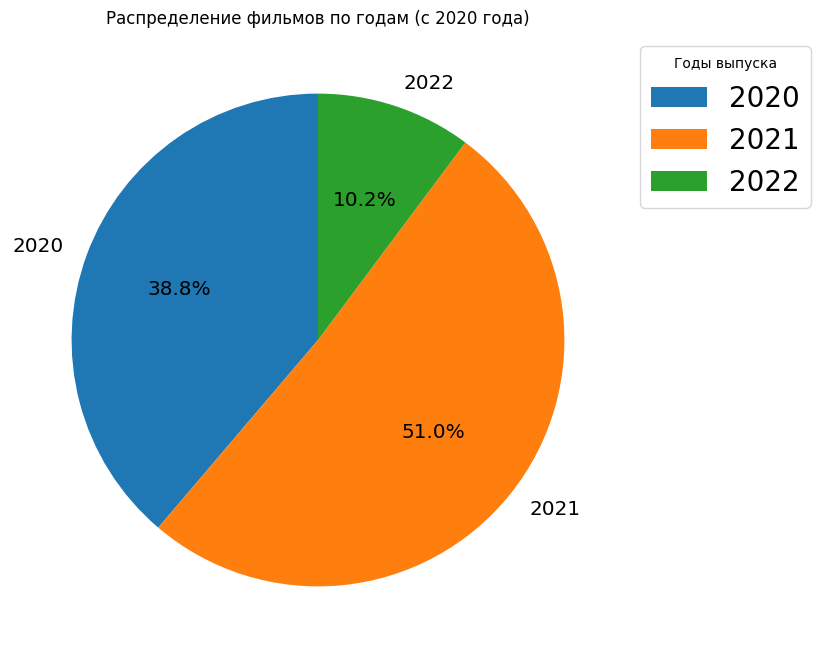

In [30]:
df_recent = df_clean[df_clean["release_year"].dt.year >= 2020]

year_counts = df_recent["release_year"].dt.year.value_counts().sort_index()

plt.figure(figsize=(20, 8))
plt.pie(
    year_counts,
    labels=year_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    textprops={'size': 'x-large'},
)

plt.legend(
    [f"{year}" for year, count in zip(year_counts.index, year_counts)],
    title="Годы выпуска",
    fontsize=20,
    bbox_to_anchor=(1, 1)
)

plt.title("Распределение фильмов по годам (с 2020 года)")
plt.show()

Круговая диаграмма показывает распределение фильмов по годам (от 2020 года): 38.8% было выпущено в 2020 году, 51% в 2021 и 10.2% в 2022

## Вывод

В ходе работы был проведён исследовательский анализ данных о фильмах. С помощью визуализаций удалось выявить основные тенденции: рост числа фильмов в последние годы, преобладание определённых жанров и стран-производителей, а также зависимость рейтингов от количества голосов и продолжительности фильмов. Построенные гистограммы, диаграммы рассеяния, сводные таблицы и круговые диаграммы позволили наглядно представить структуру и распределение данных, выявить закономерности и подготовить основу для дальнейшего анализа кинорынка. Для анализа и визуализации данных использовались библиотеки: pandas, seaborn и matplotlib.